In [56]:
import pandas as pd
import json
import pymorphy2
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from rusenttokenize import ru_sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import RussianStemmer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [42]:
df = pd.read_json('itog.json', lines=True)
df

,link,category,title,tags,text
0,https://lenta.ru/news/2023/01/17/russkiimir/,Политика: Мир,Президент Польши выразил протест идее русского...,varshava:polsha:rf:ukraina,Президент Польши Анджей Дуда выразил протест р...
1,https://lenta.ru/news/2023/01/17/frg/,Политика: Мир,Шольц высказался о последствиях энергетическог...,berlin:germaniya:ukraina,"Канцлер Германии Олаф Шольц заявил, что эконом..."
2,https://lenta.ru/news/2023/01/17/miliardi/,Политика: Мир,ЕС выделил Украине первый транш помощи,ukraina:shvetsiya,Европейский союз (ЕС) выделил Украине первый т...
3,https://lenta.ru/news/2023/01/17/netherland/,Политика: Мир,Еще одна страна ЕС рассмотрит вопрос передачи ...,niderlandy:ssha:ukraina,Правительство еще одной страны ЕС — Нидерландо...
4,https://lenta.ru/news/2023/01/17/pistoriusss/,Политика: Мир,В Германии признали участие в украинском конфл...,germaniya:ukraina,Германия участвует в конфликте на Украине непр...
...,...,...,...,...,...
3972,https://lenta.ru/news/2022/02/16/lyzhnya/,Олимпиада: Спорт,Российские лыжники завоевали бронзу в командно...,bolshunov-aleksandr:terentiev-aleksandr:niskan...,Российские лыжники завоевали бронзу в командно...
3973,https://lenta.ru/news/2022/02/16/fetisov/,Олимпиада: Спорт,Фетисов оценил шансы сборной России по хоккею ...,shipachev-vadim:voynov-vyacheslav:fetisov-vyac...,Двукратный олимпийский чемпион по хоккею Вячес...
3974,https://lenta.ru/news/2022/02/16/lyzhi/,Олимпиада: Спорт,Российские лыжницы завоевали бронзу в командно...,bolshunov-aleksandr:chervotkin-aleksey:stepano...,Российские лыжницы завоевали бронзу в командно...
3975,https://lenta.ru/news/2022/02/16/granddad/,Олимпиада: Спорт,Дедушка Валиевой подтвердил употребление триме...,osvald-denis:valieva-kamila,Дедушка российской фигуристки Камилы Валиевой ...


In [44]:
for i in range(len(df)):
    text = df['text'][i]
    punct = "!'#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’"
    clean_text = [i.strip(punct) for i in word_tokenize(text)]
    clean_text = [i.lower() for i in clean_text if i != '']
    sw = stopwords.words('russian')
    clean_text1 = []
    for j in clean_text:
        if j not in sw:
            clean_text1.append(j)
    df['text'][i] = clean_text1

In [45]:
df

,link,category,title,tags,text
0,https://lenta.ru/news/2023/01/17/russkiimir/,Политика: Мир,Президент Польши выразил протест идее русского...,varshava:polsha:rf:ukraina,"[президент, польши, анджей, дуда, выразил, про..."
1,https://lenta.ru/news/2023/01/17/frg/,Политика: Мир,Шольц высказался о последствиях энергетическог...,berlin:germaniya:ukraina,"[канцлер, германии, олаф, шольц, заявил, эконо..."
2,https://lenta.ru/news/2023/01/17/miliardi/,Политика: Мир,ЕС выделил Украине первый транш помощи,ukraina:shvetsiya,"[европейский, союз, ес, выделил, украине, перв..."
3,https://lenta.ru/news/2023/01/17/netherland/,Политика: Мир,Еще одна страна ЕС рассмотрит вопрос передачи ...,niderlandy:ssha:ukraina,"[правительство, одной, страны, ес, нидерландов..."
4,https://lenta.ru/news/2023/01/17/pistoriusss/,Политика: Мир,В Германии признали участие в украинском конфл...,germaniya:ukraina,"[германия, участвует, конфликте, украине, непр..."
...,...,...,...,...,...
3972,https://lenta.ru/news/2022/02/16/lyzhnya/,Олимпиада: Спорт,Российские лыжники завоевали бронзу в командно...,bolshunov-aleksandr:terentiev-aleksandr:niskan...,"[российские, лыжники, завоевали, бронзу, коман..."
3973,https://lenta.ru/news/2022/02/16/fetisov/,Олимпиада: Спорт,Фетисов оценил шансы сборной России по хоккею ...,shipachev-vadim:voynov-vyacheslav:fetisov-vyac...,"[двукратный, олимпийский, чемпион, хоккею, вяч..."
3974,https://lenta.ru/news/2022/02/16/lyzhi/,Олимпиада: Спорт,Российские лыжницы завоевали бронзу в командно...,bolshunov-aleksandr:chervotkin-aleksey:stepano...,"[российские, лыжницы, завоевали, бронзу, коман..."
3975,https://lenta.ru/news/2022/02/16/granddad/,Олимпиада: Спорт,Дедушка Валиевой подтвердил употребление триме...,osvald-denis:valieva-kamila,"[дедушка, российской, фигуристки, камилы, вали..."


In [46]:
corpus_tokens = []
morph = pymorphy2.MorphAnalyzer()
for i in range(len(df)):
    tokens = []
    for j in range(len(df['text'][i])):
        if morph.word_is_known(df['text'][i][j]):
            tokens.append(df['text'][i][j])
    if len(tokens) > 0:
        corpus_tokens.append(tokens)
len(corpus_tokens)

3977

In [47]:
fin_corpus = []
stemmer = RussianStemmer()
for i, tokens in enumerate(corpus_tokens):
    changes = [stemmer.stem(word) for word in tokens]
    fin_corpus.append(changes)
fin_corpus = np.asarray(fin_corpus)

In [48]:
mas_tokens = np.asarray([len(tokens) for tokens in fin_corpus])
print(mas_tokens.min())

33


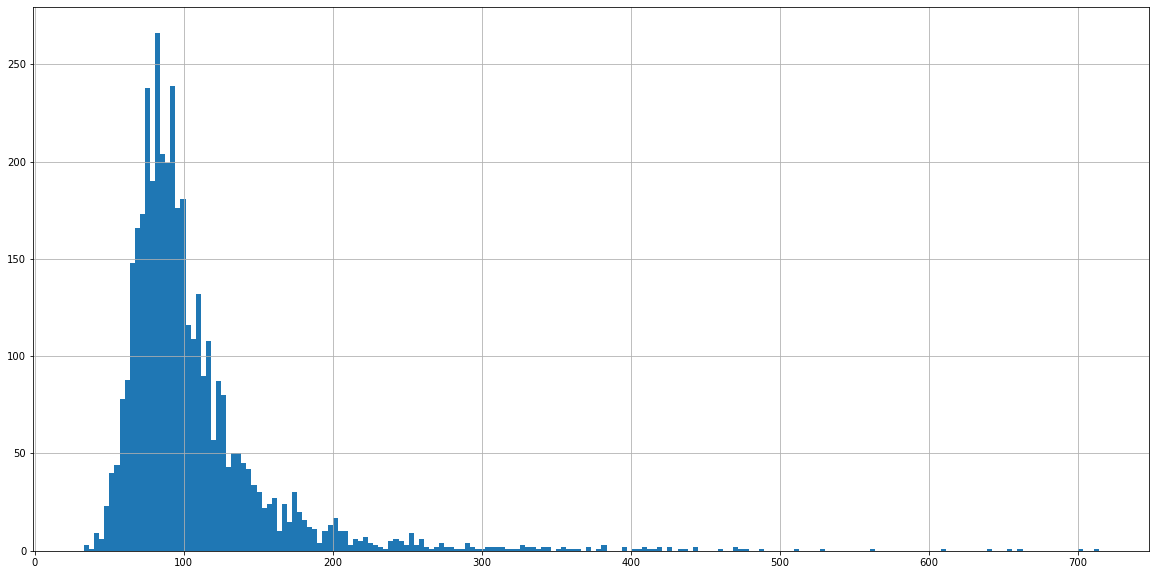

In [49]:
plt.figure(figsize=(20, 10))
plt.hist(mas_tokens, bins=200)
plt.grid(True)

In [40]:
vocab = np.unique(np.concatenate(fin_corpus).flatten()).tolist()
print(len(vocab))

202


In [10]:
data = []
for i in range(len(fin_corpus)):
    data.append([' '.join(fin_corpus[i]), df["category"][i]])
data = pd.DataFrame(data, columns=["text", "category"])

In [11]:
data

,text,category
0,президент польш андж дуд выраз протест русск м...,Политика: Мир
1,канцлер герман заяв экономик стран сможет пере...,Политика: Мир
2,европейск союз ес выдел украин перв транш помо...,Политика: Мир
3,правительств одн стран ес нидерланд рассматрив...,Политика: Мир
4,герман участв конфликт украин непрям образ при...,Политика: Мир
...,...,...
3972,российск лыжник завоева бронз командн спринт о...,Олимпиада: Спорт
3973,двукратн олимпийск чемпион хокк вячесла фетис ...,Олимпиада: Спорт
3974,российск лыжниц завоева бронз командн спринт о...,Олимпиада: Спорт
3975,дедушк российск фигуристк камил валиев подтвер...,Олимпиада: Спорт


In [12]:
data_train, data_test = train_test_split(data, test_size=0.2)
print(len(data_train), len(data_test))

3181 796


In [14]:
data_train.category.value_counts()

Политика: Мир                345
Рынки: Экономика             180
Госэкономика: Экономика      179
Кино: Культура               176
Бокс и ММА: Спорт            175
Авто: Спорт                  167
Музыка: Культура             166
Зимние виды: Спорт           163
Бизнес: Экономика            162
Искусство: Культура          157
Олимпиада: Спорт             156
Капитал: Экономика           156
Футбол: Спорт                154
Общество: Мир                136
Сериалы: Культура            133
Деловой климат: Экономика    133
Происшествия: Мир            128
Преступность: Мир            125
Книги: Культура              115
Конфликты: Мир                64
Театр: Культура                5
Летние виды: Спорт             5
Архитектура: Культура          1
Name: category, dtype: int64

In [15]:
vectorizer = TfidfVectorizer(vocabulary=vocab)
vectorizer.fit(data["text"])

TfidfVectorizer(vocabulary=['1-м', '10-е', '10-й', '10-м', '100-м', '11-го',
                            '11-е', '11-й', '11-м', '11-ю', '12-го', '12-е',
                            '12-й', '12-ю', '13-го', '13-е', '13-й', '13-м',
                            '13-ю', '14-го', '14-е', '14-й', '14-м', '15-е',
                            '15-й', '15-м', '16-го', '16-е', '16-й', '16-м', ...])

In [16]:
data_train_vect = vectorizer.transform(data_train["text"])
data_train_cat = data_train["category"]
data_test_vect = vectorizer.transform(data_test["text"])
data_test_cat = data_test["category"]

KNN (K-Nearest Neighbors — K Ближайших Соседей)

In [17]:
parameters_knn = { # параметры для KNN модели
    "n_neighbors": [3, 5, 10, 15],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan"]
}

gs_knn = GridSearchCV( # параметры GridSearchCV
    KNeighborsClassifier(),
    parameters_knn,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_knn_res = gs_knn.fit(data_train_vect, data_train_cat) # подбираем лучшие параметры для оценщика
pred_knn = gs_knn_res.best_estimator_.predict(data_test_vect) # предсказываем
print(metrics.classification_report(data_test_cat, pred_knn)) # выписываем основные метрики

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   13.6s finished


                           precision    recall  f1-score   support

              Авто: Спорт       0.98      1.00      0.99        42
        Бизнес: Экономика       0.62      0.44      0.51        41
        Бокс и ММА: Спорт       0.96      0.93      0.95        29
  Госэкономика: Экономика       0.64      0.37      0.47        43
Деловой климат: Экономика       0.44      0.47      0.46        17
       Зимние виды: Спорт       0.97      0.80      0.88        46
      Искусство: Культура       0.93      0.95      0.94        39
       Капитал: Экономика       0.68      0.84      0.75        50
           Кино: Культура       0.80      0.71      0.75        51
          Книги: Культура       0.80      0.69      0.74        29
           Конфликты: Мир       0.67      0.40      0.50        10
         Музыка: Культура       0.83      0.83      0.83        42
            Общество: Мир       0.67      0.28      0.39        36
         Олимпиада: Спорт       0.90      0.95      0.93     

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGD (Stochastic Gradient Descent — Стохастический Градиентный Спуск)

In [18]:
parameters_sgd = {
    "penalty": ["elasticnet", "l2", "l1"],
    "alpha": [0.0001, 0.01, 0.1, 0.5, 1, 5],
    "max_iter": [100, 500, 1000, 2000],
    "learning_rate": ["optimal", "invscaling", "adaptive"],
    "eta0": [1, 10]
}

gs_sgd = GridSearchCV(
    SGDClassifier(),
    parameters_sgd,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_sgd_res = gs_sgd.fit(data_train_vect, data_train_cat)
pred_sgd = gs_sgd_res.best_estimator_.predict(data_test_vect)
print(metrics.classification_report(data_test_cat, pred_sgd))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  5.6min finished


                           precision    recall  f1-score   support

              Авто: Спорт       0.91      1.00      0.95        42
        Бизнес: Экономика       0.66      0.46      0.54        41
        Бокс и ММА: Спорт       0.88      1.00      0.94        29
  Госэкономика: Экономика       0.71      0.40      0.51        43
Деловой климат: Экономика       0.44      0.71      0.55        17
       Зимние виды: Спорт       1.00      0.83      0.90        46
      Искусство: Культура       0.88      0.97      0.93        39
       Капитал: Экономика       0.83      0.86      0.84        50
           Кино: Культура       0.75      0.78      0.77        51
          Книги: Культура       0.85      0.79      0.82        29
           Конфликты: Мир       1.00      0.40      0.57        10
         Музыка: Культура       0.86      0.86      0.86        42
            Общество: Мир       0.67      0.33      0.44        36
         Олимпиада: Спорт       0.91      0.97      0.94     

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Логистическая регрессия

In [19]:
parameters_log = {
    "penalty": ["l2", "l1"],
    "C": np.logspace(-4, 4, 10),
    "solver": ["saga"],
    "max_iter": [500, 1000]
}

gs_log = GridSearchCV(
    LogisticRegression(),
    parameters_log,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_log_res = gs_log.fit(data_train_vect, data_train_cat)
pred_log = gs_log_res.best_estimator_.predict(data_test_vect)
print(metrics.classification_report(data_test_cat, pred_log))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.6min finished


                           precision    recall  f1-score   support

              Авто: Спорт       0.95      1.00      0.98        42
        Бизнес: Экономика       0.59      0.54      0.56        41
        Бокс и ММА: Спорт       0.97      0.97      0.97        29
  Госэкономика: Экономика       0.69      0.56      0.62        43
Деловой климат: Экономика       0.48      0.76      0.59        17
       Зимние виды: Спорт       1.00      0.87      0.93        46
      Искусство: Культура       0.95      0.97      0.96        39
       Капитал: Экономика       0.86      0.86      0.86        50
           Кино: Культура       0.73      0.78      0.75        51
          Книги: Культура       0.83      0.69      0.75        29
           Конфликты: Мир       0.56      0.50      0.53        10
         Музыка: Культура       0.88      0.90      0.89        42
            Общество: Мир       0.61      0.39      0.47        36
         Олимпиада: Спорт       0.95      0.95      0.95     

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Случайный лес (Random Forest Classifier)

In [20]:
parameters_forest = {
    "n_estimators": [5, 10, 25, 100, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 25, 100],
    "min_samples_split": [2, 5, 10],
    "max_features": [None, "sqrt"]
}

gs_forest = GridSearchCV(
    RandomForestClassifier(),
    parameters_forest,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_forest_res = gs_forest.fit(data_train_vect, data_train_cat)
pred_forest = gs_forest_res.best_estimator_.predict(data_test_vect)
print(metrics.classification_report(data_test_cat, pred_forest))

Fitting 3 folds for each of 240 candidates, totalling 720 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 87.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 188.2min finished


                           precision    recall  f1-score   support

              Авто: Спорт       0.95      0.98      0.96        42
        Бизнес: Экономика       0.71      0.49      0.58        41
        Бокс и ММА: Спорт       0.97      1.00      0.98        29
  Госэкономика: Экономика       0.70      0.37      0.48        43
Деловой климат: Экономика       0.60      0.71      0.65        17
       Зимние виды: Спорт       1.00      0.89      0.94        46
      Искусство: Культура       0.87      0.87      0.87        39
       Капитал: Экономика       0.74      0.78      0.76        50
           Кино: Культура       0.80      0.78      0.79        51
          Книги: Культура       0.85      0.76      0.80        29
           Конфликты: Мир       1.00      0.30      0.46        10
         Музыка: Культура       0.84      0.86      0.85        42
            Общество: Мир       0.69      0.25      0.37        36
         Олимпиада: Спорт       0.95      0.97      0.96     

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Наивный байесовский классификатор (Naive Bayes classifier)

In [21]:
parameters_nb = {
    "alpha": [0.00001, 0.0001, 0.01, 0.1, 1] 
}

gs_nb = GridSearchCV(
    MultinomialNB(),
    parameters_nb,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_nb_res = gs_nb.fit(data_train_vect, data_train_cat)
pred_nb = gs_nb_res.best_estimator_.predict(data_test_vect)
print(metrics.classification_report(data_test_cat, pred_nb))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


                           precision    recall  f1-score   support

              Авто: Спорт       1.00      0.98      0.99        42
        Бизнес: Экономика       0.67      0.49      0.56        41
        Бокс и ММА: Спорт       0.97      0.97      0.97        29
  Госэкономика: Экономика       0.64      0.63      0.64        43
Деловой климат: Экономика       0.50      0.76      0.60        17
       Зимние виды: Спорт       0.98      0.91      0.94        46
      Искусство: Культура       0.93      0.95      0.94        39
       Капитал: Экономика       0.76      0.78      0.77        50
           Кино: Культура       0.74      0.69      0.71        51
          Книги: Культура       0.88      0.76      0.81        29
           Конфликты: Мир       0.71      0.50      0.59        10
         Музыка: Культура       0.82      0.88      0.85        42
            Общество: Мир       0.70      0.39      0.50        36
         Олимпиада: Спорт       0.95      0.93      0.94     

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.4s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC (C-Support Vector Classification — Метод Опорных Векторов)

In [22]:
parameters_svc = {
    "C":  [1, 10, 100, 1000],
    "gamma": [0.001, 0.0001, "scale"],
    "kernel": ["rbf", "linear", "poly"]
}

gs_svc = GridSearchCV(
    SVC(),
    parameters_svc,
    verbose = 1,
    cv=3,
    n_jobs=-1
)

gs_svc_res = gs_svc.fit(data_train_vect, data_train_cat)
pred_svc = gs_svc_res.best_estimator_.predict(data_test_vect)
print(metrics.classification_report(data_test_cat, pred_svc))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.5min finished


                           precision    recall  f1-score   support

              Авто: Спорт       0.95      1.00      0.98        42
        Бизнес: Экономика       0.62      0.51      0.56        41
        Бокс и ММА: Спорт       0.97      0.97      0.97        29
  Госэкономика: Экономика       0.68      0.53      0.60        43
Деловой климат: Экономика       0.55      0.65      0.59        17
       Зимние виды: Спорт       1.00      0.91      0.95        46
      Искусство: Культура       0.91      1.00      0.95        39
       Капитал: Экономика       0.80      0.86      0.83        50
           Кино: Культура       0.74      0.82      0.78        51
          Книги: Культура       0.88      0.72      0.79        29
           Конфликты: Мир       0.71      0.50      0.59        10
         Музыка: Культура       0.93      0.88      0.90        42
            Общество: Мир       0.61      0.39      0.47        36
         Олимпиада: Спорт       0.97      0.93      0.95     

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
data_test['category'].describe()

count               796
unique               21
top       Политика: Мир
freq                113
Name: category, dtype: object

In [51]:
data_test["category"].value_counts()

Политика: Мир                113
Кино: Культура                51
Капитал: Экономика            50
Зимние виды: Спорт            46
Госэкономика: Экономика       43
Авто: Спорт                   42
Музыка: Культура              42
Бизнес: Экономика             41
Происшествия: Мир             40
Олимпиада: Спорт              40
Искусство: Культура           39
Общество: Мир                 36
Сериалы: Культура             35
Футбол: Спорт                 33
Преступность: Мир             30
Книги: Культура               29
Рынки: Экономика              29
Бокс и ММА: Спорт             29
Деловой климат: Экономика     17
Конфликты: Мир                10
Театр: Культура                1
Name: category, dtype: int64

In [52]:
data_test['text'].describe()

count                                                   796
unique                                                  794
top       вооружен сил эритр уб человек приграничн регио...
freq                                                      2
Name: text, dtype: object

In [53]:
data_test["text"].value_counts()

вооружен сил эритр уб человек приграничн регион эфиоп заяв глав всемирн организац здравоохранен воз пресс-конференц женев цитир американск газет слов явля уроженц сред убит ход нападен эфиопск деревн дяд глав воз сообщ рассматрива возможн отмен пресс-конференц тем нефтян живет сам опасн стран август росс реш закреп африк стран запад пыта помеша август разговарива матер очен опустош сам младш сем сказа добав надеет прекращен безум назва войн сил автономн регион одн сторон такж эфиоп эритре уточня ноябр правительств эфиоп руководств достигл соглашен прекращен боев действ однак договор распространя эритр отмеча ход вооружен конфликт воен преступлен имел мест ма переизбра глав всемирн организац здравоохранен втор срок занима должност год эт перв представител африканск регион воз возглав соответств правил организац переизбира должност гендиректор род эритр заня пост генсек воз советник премьер-министр эфиоп год год министр иностра дел год министр здравоохранен стран                         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

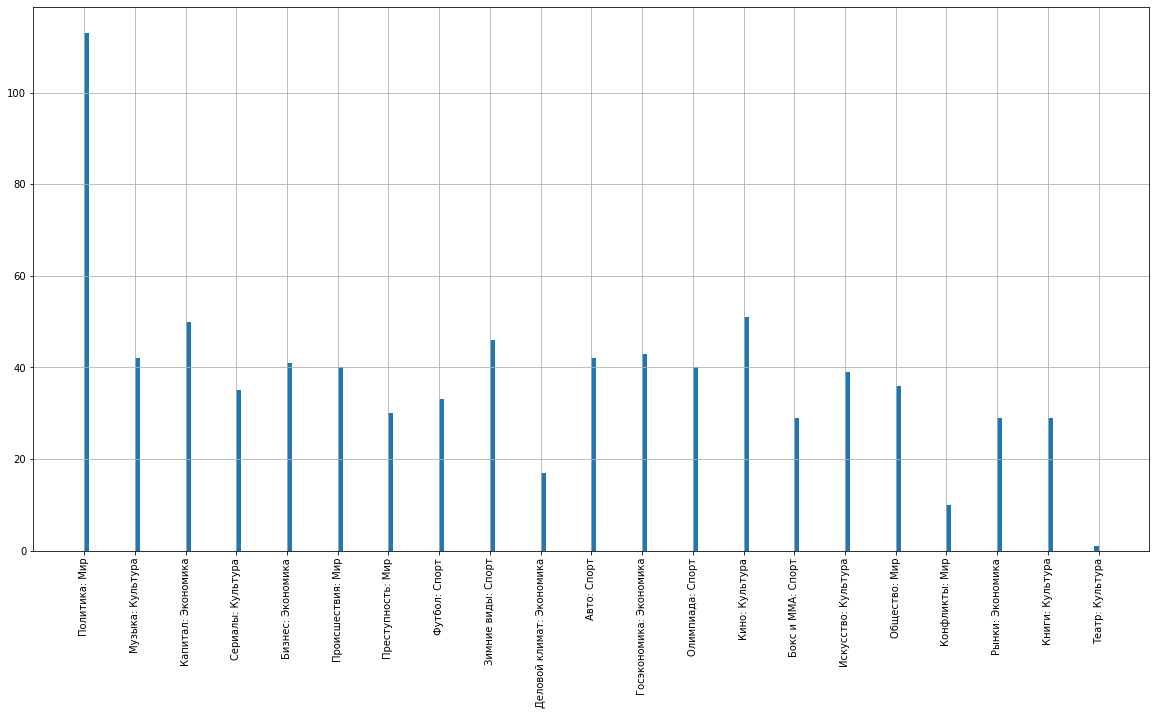

In [72]:
plt.figure(figsize=(20, 10))
plt.hist(data_test["category"], bins=200)
plt.grid(True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

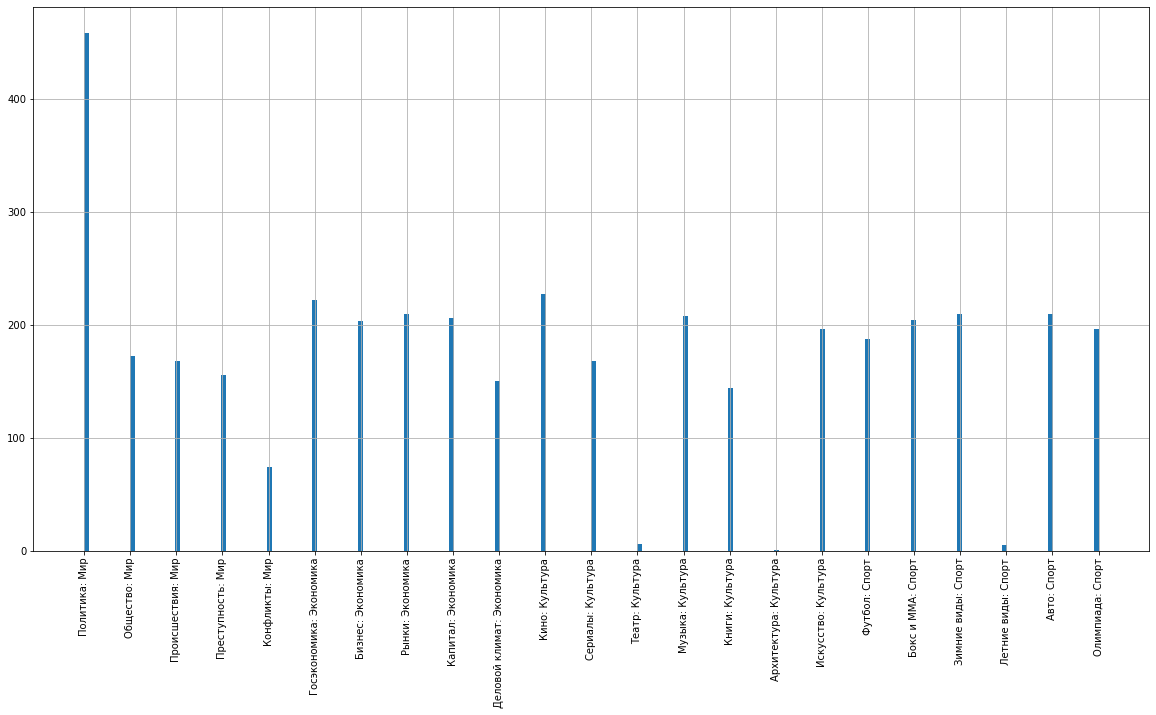

In [73]:
plt.figure(figsize=(20, 10))
plt.hist(df["category"], bins=200)
plt.grid(True)
plt.xticks(rotation=90)

Если честно я фиг его знает какую тут можно сделать визуализацию, чтобы понять какая модель лучше это не требуется, вроде как. Конечно можно сделать графики как тестовая модель собралась, но типо, это не сильно вроде и нужно. Поэтому я просто сравню резы по основным метрикам, пожалуюсь на то, сколько все это считалось и пойду спать.

1. KNN -
Хорошая модель(14 сек ожидания), самая низкая точность.
                           
                           precision    recall  f1-score   support
                 accuracy                           0.75       796
                macro avg       0.71      0.69      0.69       796
             weighted avg       0.76      0.75      0.74       796
             
             
2. SGD -
Тоже неплохая, 5 минут ожидания, точность на уровне, не самый лучший результат, скорее среденее результаты. Скорее всего, если бы категорий было меньше все было бы лучше.
                           
                           precision    recall  f1-score   support
                 accuracy                           0.77       796
                macro avg       0.74      0.71      0.71       796
             weighted avg       0.78      0.77      0.76       796
             

3. Логистическая регрессия -
Сомнительная модель(20 минут ожидания), 2 место по общей точности, однако вприниципе достойные результаты по самым многочисленным категориям. Так что, если бы не время, то я бы назвал ее самой оптимальной.

                           precision    recall  f1-score   support
                 accuracy                           0.78       796
                macro avg       0.73      0.72      0.72       796
             weighted avg       0.78      0.78      0.78       796
             
4. Случайный лес -
Исчадье, ужас, мучитильная фигня(190 минут ожидания). Низкая точность, плохо предсказывает самые крупные категории. Не советую, это нужно запретить.                

                           precision    recall  f1-score   support
                 accuracy                           0.76       796
                macro avg       0.75      0.70      0.70       796
             weighted avg       0.77      0.76      0.75       796
             
5. Наивный байесовский классификатор -
Я удивлен, что это не самая лучшая модель, 2.6 сек ожидания, в приципе при такой простоте, точность достаточно неплоха.                           
                           
                           precision    recall  f1-score   support                     
                 accuracy                           0.77       796
                macro avg       0.72      0.72      0.71       796
             weighted avg       0.77      0.77      0.77       796

6. SVC -
Победитель, самая высокая точность.                           
                           
                           precision    recall  f1-score   support
                 accuracy                           0.79       796
                macro avg       0.74      0.73      0.73       796
             weighted avg       0.79      0.79      0.78       796

Вывод: Обучение модели было сильно осложнено наличием большого количества категорий, в принципе это можно решить, объединим категории типа Мир:Политика, Мир:Преступность в одну общую - Мир, точность от этого сильно возрастет, как и снизиться время работы. В принципе в таком усложнении есть и плюс, это наглядно показало насколько сложно модели обучаться имея такие похожие темы, особенно меня удивили результаты по экономике, поскольку там имееться две достаточно схожие подкатегории, то точность предсказания у каждой метрики в пределах 60%, к тому же важным фактором является то, что в тексте по экономике много слов, которые совпадают с политикой. "Президент", "Парламент", и т.п., важные новости экономики связаны с важными органами власти, которые также упоминаются в политике, так что это тоже сбивало модели с толку.
В принципе если усложнить процесс обработки текста, оставив там только самые важные слова, добавить больше статей по категориям, или уменьшим колличество категорий, то все было бы на уровне, ведь, как видно по результатам модели достаточно точно предсказывают самые большие по колличеству категории.